In [85]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [86]:
# get datas from Kaggle
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [87]:
# see 5 elements
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
# One hot encoding
insurance_one_hot = pd.get_dummies(insurance)

In [89]:
# create features and labels
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot['charges']


In [90]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [91]:
# Create random seed
tf.random.set_seed(42)

# Make callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5,min_delta=1.0,mode='min',verbose=1,start_from_epoch=15)

# Create a model with encoding but without normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train, y_train, epochs=200, callbacks=[callback] ,verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12018.9727 - mae: 12018.9727
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7541.4678 - mae: 7541.4678
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7290.0225 - mae: 7290.0225
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7075.9014 - mae: 7075.9014
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6847.3940 - mae: 6847.3940
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6591.4834 - mae: 6591.4834
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 6461.3936 - mae: 6461.3936
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6284.6201 - mae: 6284.6201
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6168.5015 - mae: 6168.5015
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5999.9365 - mae: 5999.93

In [92]:
# Evaluate the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3238.9849 - mae: 3238.9849


[3238.98486328125, 3238.98486328125]

<Axes: >

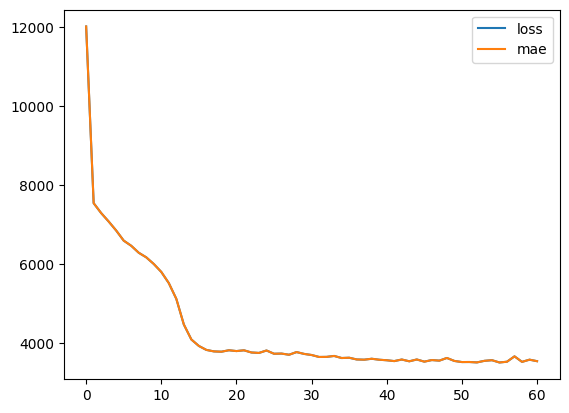

In [95]:
# Show relation between losses and epochs
pd.DataFrame(history.history).plot()


Lets create a model_normal with using both normalization and onehotencoding.
Each models are created with same hiperparameters and optimizer.
We will Look at the evaluate sections and compare them.

In [96]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [98]:
# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker','region'])
)

# Create features and labels
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test datas with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [99]:
# random seed
tf.random.set_seed(42)

# create callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', start_from_epoch=15,patience=5
                                            , min_delta=1.0 ,verbose=1,restore_best_weights=True)


# create a model
model_normal= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation='relu')
])

# compile the model

model_normal.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae'],
    )

# Fit the model and assign to history
history = model_normal.fit(X_train_normal, y_train, epochs=200 ,verbose=1,callbacks = [callback])

# Save the model_normal
model_normal.save("Models/Model_onehot_normalization.h5")


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13238.4277 - mae: 13238.4277
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11530.4922 - mae: 11530.4922
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 8191.8096 - mae: 8191.8096
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7624.3618 - mae: 7624.3618
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7146.5630 - mae: 7146.5630
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6580.4497 - mae: 6580.4497
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 5703.2202 - mae: 5703.2202
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4551.9316 - mae: 4551.9316
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3783.8020 - mae: 3783.8020
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3675.9639 - mae: 3675.

In [100]:
model_normal.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3174.1687 - mae: 3174.1687


[3174.168701171875, 3174.168701171875]

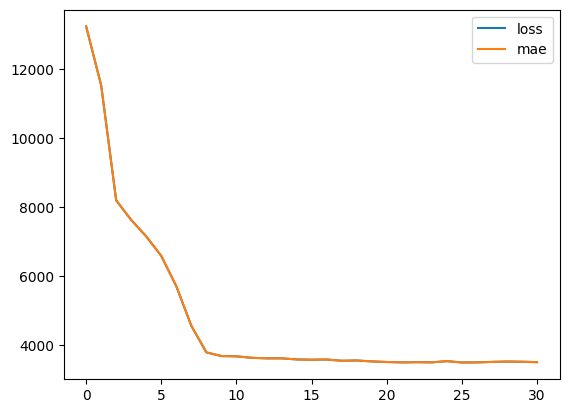

In [101]:
# lets plot history
pd.DataFrame(history.history).plot()
plt.ylabel = 'mae'
plt.xlabel = 'epochs'

In [102]:
# model prediction with test datas
predicts = model_normal.predict(X_test_normal)

tf.squeeze(tf.constant(predicts))[0:10], tf.constant(y_test)[0:10]


9/9 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 9324.128 ,  5982.5894, 44287.2   ,  9121.714 , 32238.414 ,
         5650.153 ,  1180.8813, 13149.667 ,  3665.9534, 10046.483 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
         4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])>)